

| Features name      | Description | Level of Measurement    |
| :---        |    :----:   |          ---: |
| ARAN    | AVERAGE RAINFALL     | Ratio Level  |
| TRAN   | MONTHLY TOTAL RAINFALL     |  Ratio Level   |
| TEM    | Temperature       |  Interval Level   |
|DPT	 |  Dew Point Temperature|Interval Level
|WIS	| Wind Speed|Interval Level
HUM	 |Humidity|Interval Level
SLP	| Sea Level Pressure | Interval Level
Year|     |Ratio Level
Month|    |Interval Level
Day|      |Interval Level
RAN	 |Rainfall CATEGORY |Nominal Level
NRT |	No Rain and Trace |
LTR	| Light Rain |
MHR | Moderate and High Rain |




In [ ]:
#https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
#https://www.kaggle.com/code/faizanafzal/eda-pca-all-classifiers-confusion-matrix/notebook
#https://www.kaggle.com/code/positivecoder/simple-curve-fitting-on-training-data
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_curve,RocCurveDisplay, plot_roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler

In [168]:
df=pd.read_csv('AssignmentFinal.csv')

In [169]:
df.head()

,Year,Month,DAY,TEM,DPT,WIS,HUM,SLP,TRAN,ARAN,RAN
0,1964,1,31,19.6,13.3,4.4,71.52,1014.6,3,0.10,NRT
1,1964,2,29,22.3,14.5,4.7,71.03,1013.0,3,0.10,NRT
2,1964,3,31,26.5,21.4,6.1,78.06,1010.9,0,0.00,NRT
3,1964,4,30,27.4,22.5,10.5,80.70,1007.7,198,6.60,LTR
4,1964,5,31,28.3,24.0,6.2,79.97,1004.6,195,6.29,LTR


In [170]:
data=df[['Year', 'Month', 'DAY', 'TEM', 'DPT', 'WIS', 'HUM', 'SLP', 'TRAN',
       'ARAN']]
data.head()

,Year,Month,DAY,TEM,DPT,WIS,HUM,SLP,TRAN,ARAN
0,1964,1,31,19.6,13.3,4.4,71.52,1014.6,3,0.10
1,1964,2,29,22.3,14.5,4.7,71.03,1013.0,3,0.10
2,1964,3,31,26.5,21.4,6.1,78.06,1010.9,0,0.00
3,1964,4,30,27.4,22.5,10.5,80.70,1007.7,198,6.60
4,1964,5,31,28.3,24.0,6.2,79.97,1004.6,195,6.29


In [171]:
# from sklearn.preprocessing import normalize
# data_scaled = normalize(data) 
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# data_scaled.head()

In [172]:
# sns.set_style("darkgrid")
# fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(30, 20),facecolor='#93bedb')
# index = 0
# axs = axs.flatten()
# for column_name, column_value in data.items():
#     sns.histplot(column_value, ax=axs[index])
#     axs[index].set_title(column_name, fontweight='bold', fontsize=20, color='red')  
#     index += 1
# plt.tight_layout()

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    624 non-null    int64  
 1   Month   624 non-null    int64  
 2   DAY     624 non-null    int64  
 3   TEM     624 non-null    float64
 4   DPT     624 non-null    float64
 5   WIS     624 non-null    float64
 6   HUM     624 non-null    float64
 7   SLP     624 non-null    float64
 8   TRAN    624 non-null    int64  
 9   ARAN    624 non-null    float64
 10  RAN     624 non-null    object 
dtypes: float64(6), int64(4), object(1)
memory usage: 53.8+ KB


In [174]:
df.nunique()

Year      52
Month     12
DAY        4
TEM      113
DPT      135
WIS      159
HUM      496
SLP      163
TRAN     347
ARAN     383
RAN        3
dtype: int64

In [175]:
df.duplicated().sum()

0

In [176]:
df.isnull().sum()

Year     0
Month    0
DAY      0
TEM      0
DPT      0
WIS      0
HUM      0
SLP      0
TRAN     0
ARAN     0
RAN      0
dtype: int64

In [177]:
df.describe()[1:10].T

,mean,std,min,25%,50%,75%,max
Year,1989.500000,15.020371,1964.00,1976.7500,1989.500,2002.2500,2015.00
Month,6.500000,3.454822,1.00,3.7500,6.500,9.2500,12.00
DAY,30.437500,0.814754,28.00,30.0000,31.000,31.0000,31.00
TEM,25.730288,3.107279,18.10,23.3750,27.300,28.1000,29.90
DPT,20.874038,4.308750,9.10,16.8000,23.000,24.5000,26.00
WIS,6.557083,2.591438,0.00,4.6000,6.100,8.3000,13.80
HUM,79.205833,5.918284,62.14,75.1825,79.595,84.3750,91.81
SLP,1008.418750,4.777390,981.70,1004.2750,1008.950,1012.6000,1016.70
TRAN,240.684295,290.318287,0.00,7.0000,126.000,380.2500,1494.00
ARAN,7.864071,9.463610,0.00,0.2300,4.130,12.2675,49.80


In [178]:
df.RAN.value_counts()

LTR    224
NRT    205
MHR    195
Name: RAN, dtype: int64

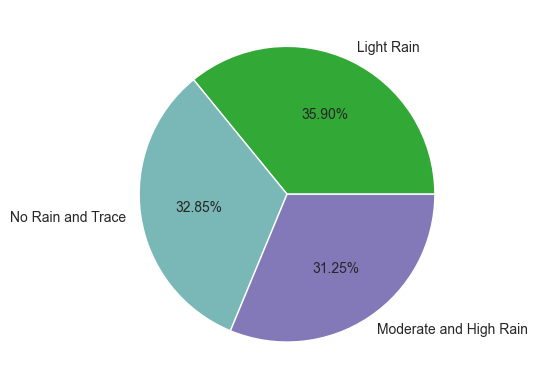

In [179]:
# Pie Chart
Rainfall_fre=[224,205,195] 
plt.pie(Rainfall_fre, labels=['Light Rain','No Rain and Trace','Moderate and High Rain'], colors=['#32a836','#79b8b6', '#8479b8'],  autopct='%.2f%%')
plt.show()


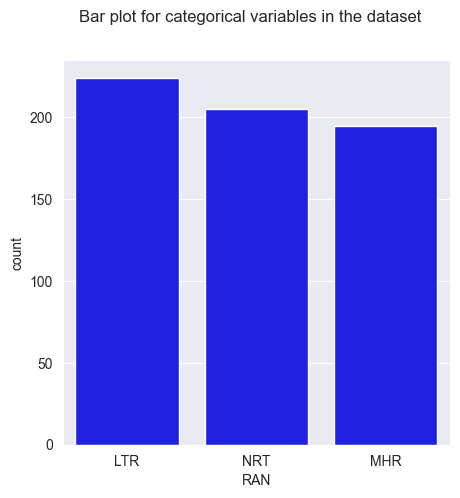

In [180]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle('Bar plot for categorical variables in the dataset')
sns.countplot(x='RAN', data=df, color='blue', order=df['RAN'].value_counts().index)
plt.show()


In [181]:
df.columns

Index(['Year', 'Month', 'DAY', 'TEM', 'DPT', 'WIS', 'HUM', 'SLP', 'TRAN',
       'ARAN', 'RAN'],
      dtype='object')

In [182]:
for column_name, column_value in df.drop(columns=['RAN']).items():
    q1 = column_value.quantile(0.25)
    q3 = column_value.quantile(0.75)
    irq = q3 - q1
    v_col = column_value[(column_value <= q1 - 1.5 * irq) | (column_value >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (column_name, perc))

Column Year outliers = 0.00%
Column Month outliers = 0.00%
Column DAY outliers = 6.25%
Column TEM outliers = 0.00%
Column DPT outliers = 0.00%
Column WIS outliers = 0.00%
Column HUM outliers = 0.00%
Column SLP outliers = 0.32%
Column TRAN outliers = 3.53%
Column ARAN outliers = 3.53%


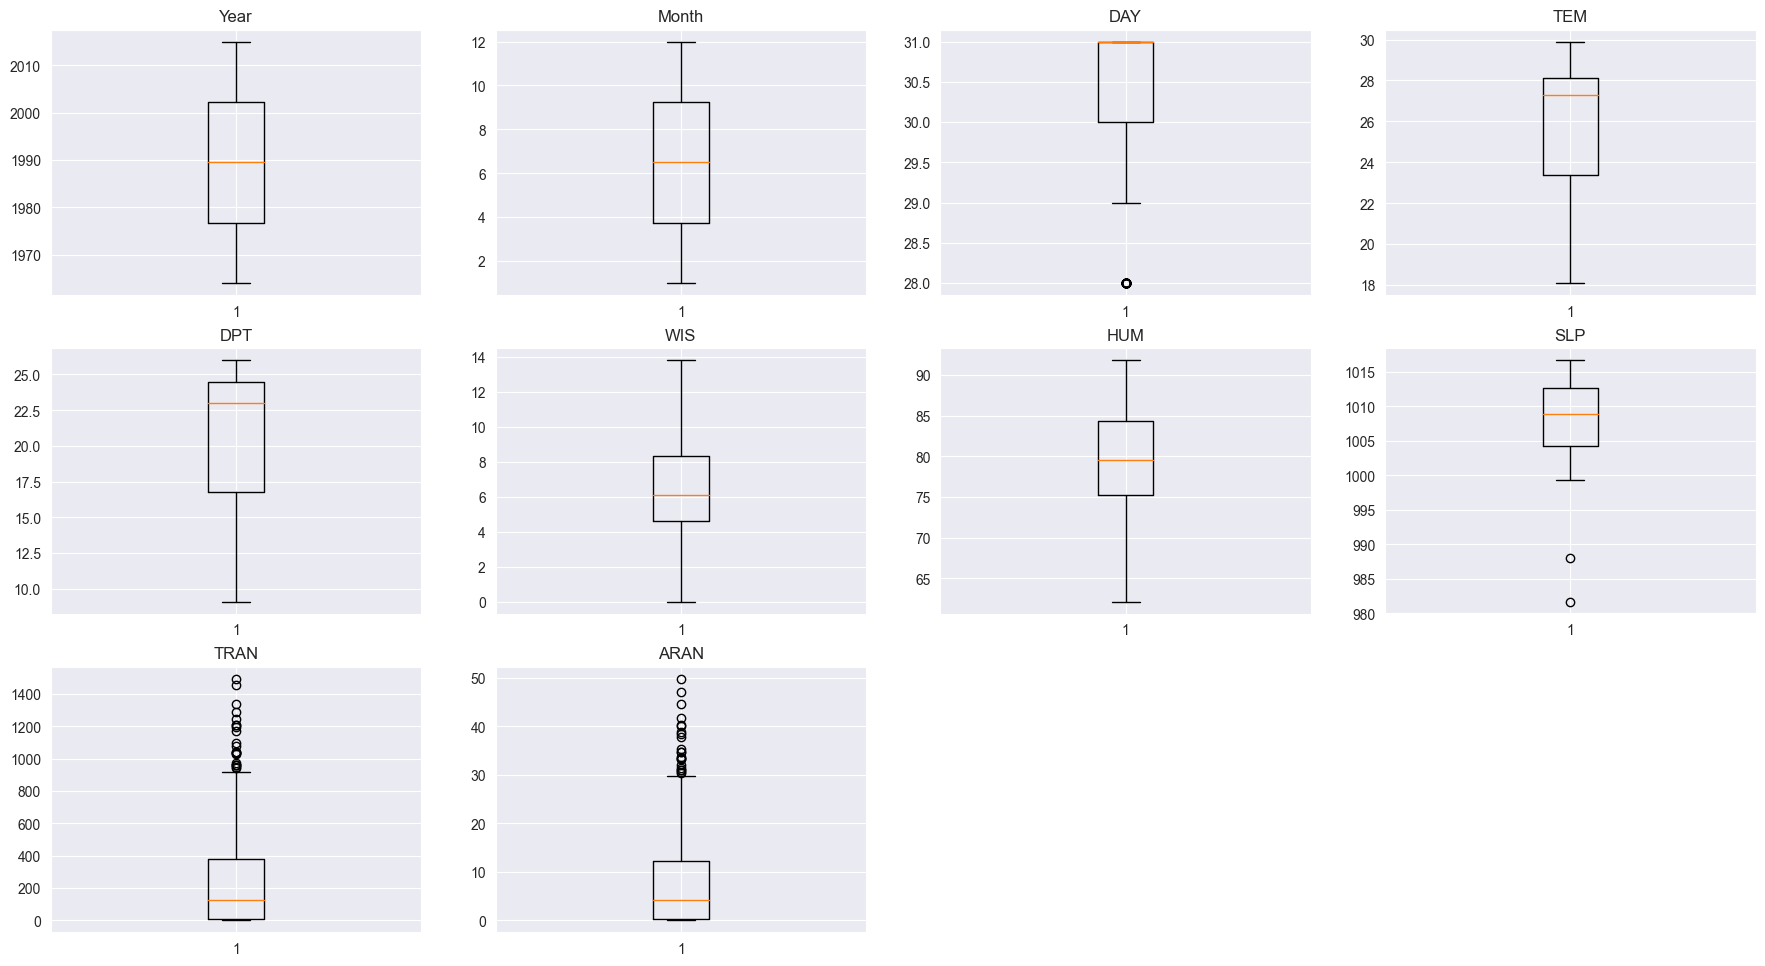

In [183]:
outliers_by_10_variables = ['Year', 'Month', 'DAY', 'TEM', 'DPT', 'WIS', 'HUM', 'SLP', 'TRAN',
       'ARAN'] 
plt.figure(figsize=(22,20))

for i in range(0,10):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df[outliers_by_10_variables[i]])
    plt.title(outliers_by_10_variables[i])

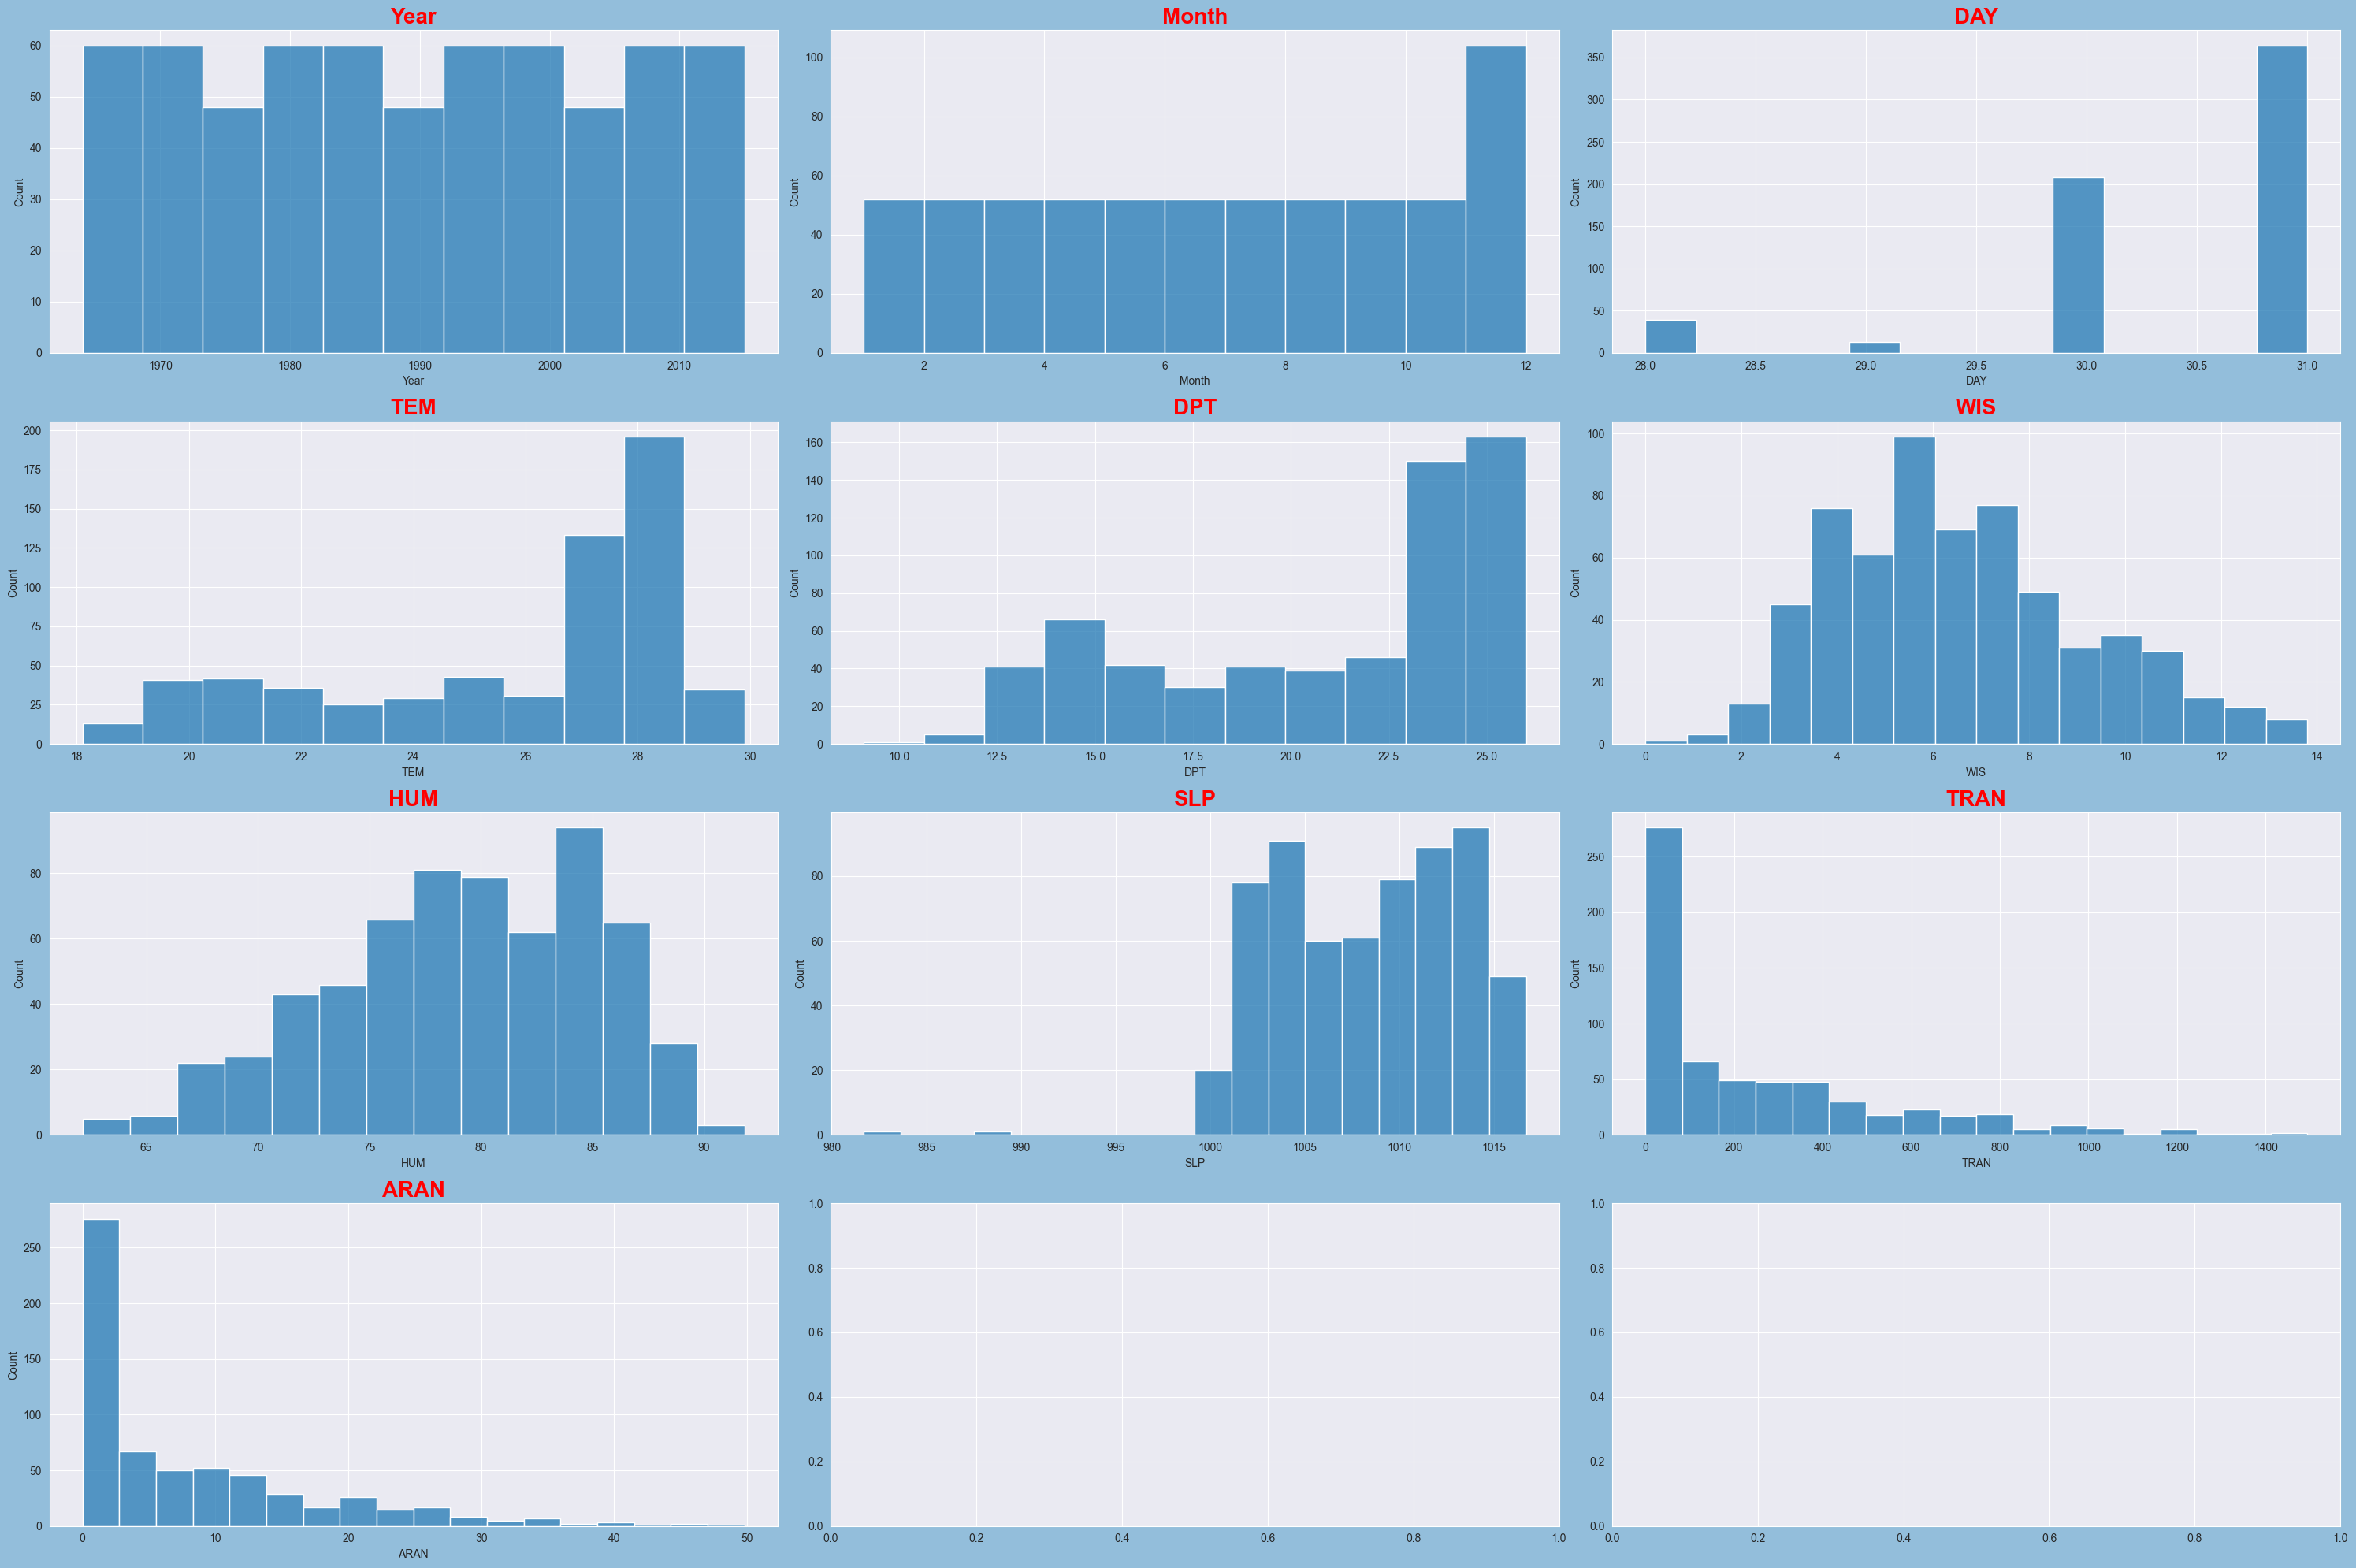

In [184]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(30, 20),facecolor='#93bedb')
index = 0
axs = axs.flatten()
for column_name, column_value in df.drop(columns=['RAN']).items():
    sns.histplot(column_value, ax=axs[index])
    axs[index].set_title(column_name, fontweight='bold', fontsize=20, color='red')  
    index += 1
plt.tight_layout()

<Figure size 1300x1700 with 0 Axes>

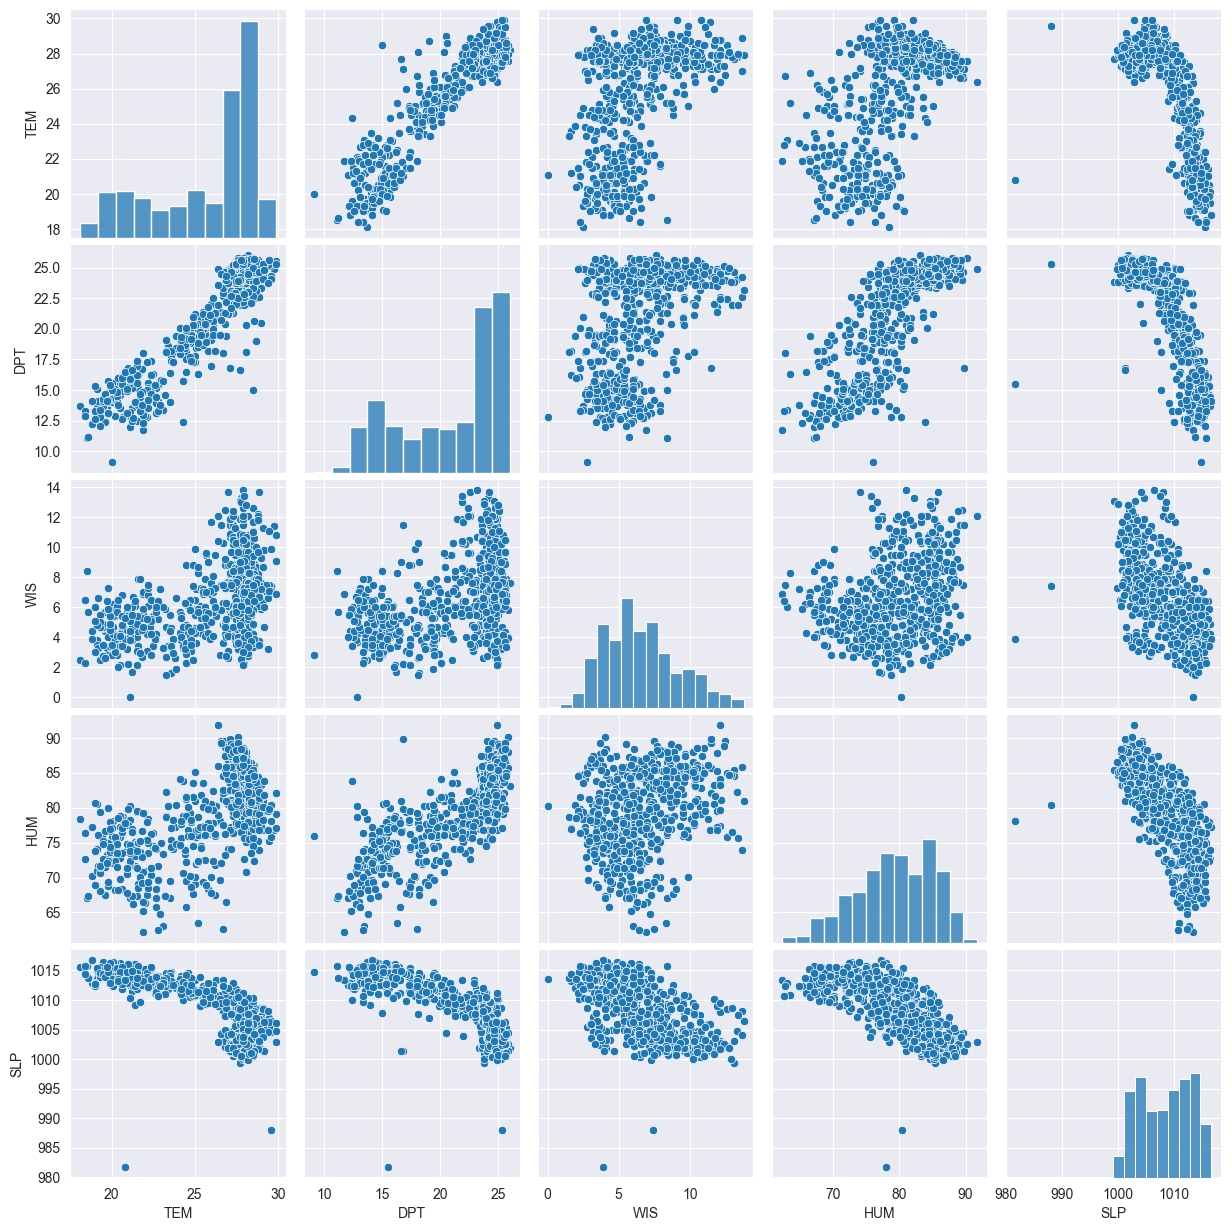

In [185]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['Year', 'Month', 'DAY', 'TRAN',
       'ARAN','RAN'],axis=1))
plt.show()

In [186]:
X = df.drop(columns=['RAN'])
y = df['RAN']
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
print(feature_importance)


Year     0.002566
Month    0.011009
DAY      0.000637
TEM      0.041707
DPT      0.087337
WIS      0.008085
HUM      0.057525
SLP      0.052081
TRAN     0.323825
ARAN     0.415229
dtype: float64


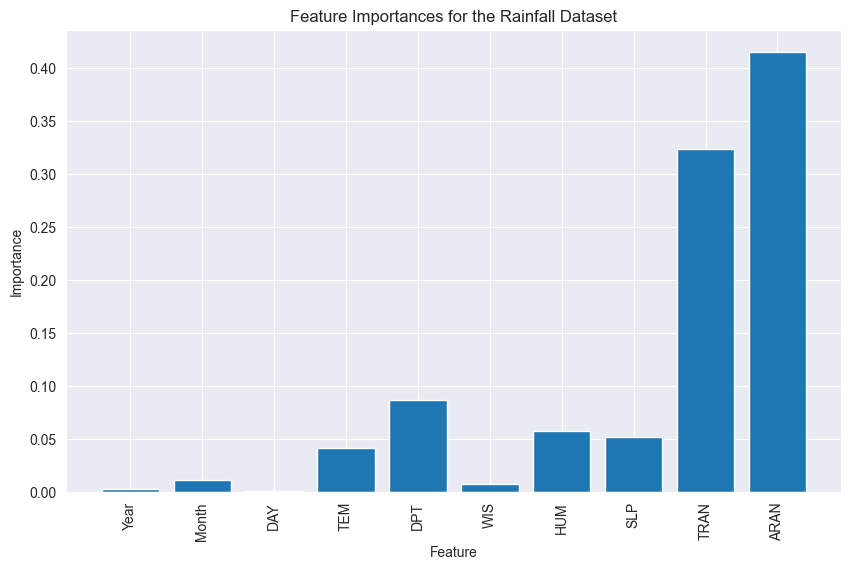

In [187]:
plt.figure(figsize=(10,6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for the Rainfall Dataset')
plt.show()

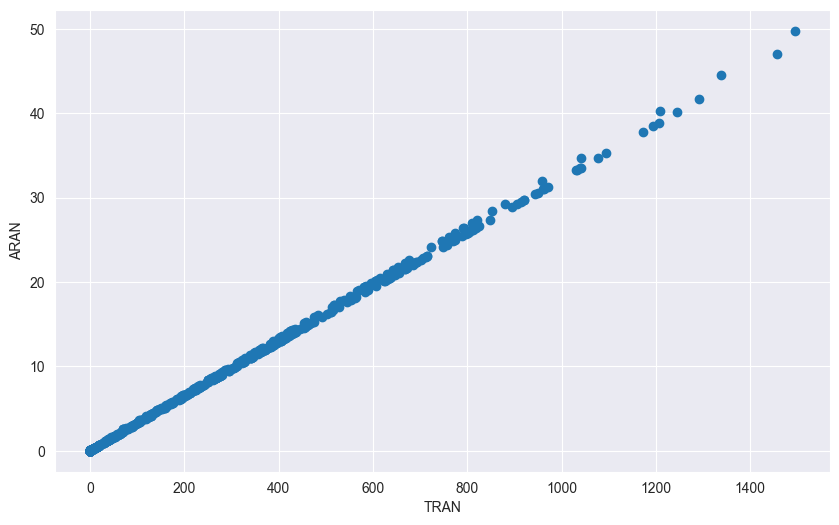

In [188]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['TRAN'], df['ARAN'])
ax.set_xlabel('TRAN')
ax.set_ylabel('ARAN')
plt.show()

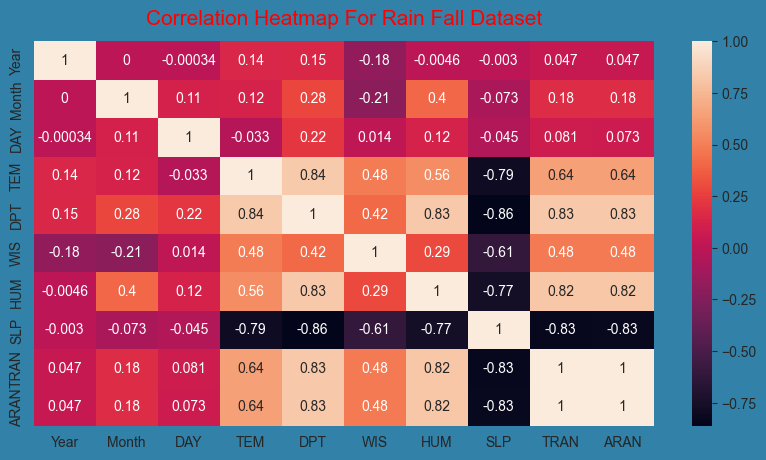

In [189]:
plt.figure(figsize=(10, 5),facecolor='#3281a8')
corrmat=df.corr(method='spearman')
heat_map=sns.heatmap(corrmat, annot=True )
heat_map.set_title('Correlation Heatmap For Rain Fall Dataset', fontdict={'fontsize':15}, pad=12 ,color='red');
plt.show()

In [190]:
data=df.drop(['Year', 'Month', 'DAY', 'TRAN','ARAN'], axis='columns')
data.head()

,TEM,DPT,WIS,HUM,SLP,RAN
0,19.6,13.3,4.4,71.52,1014.6,NRT
1,22.3,14.5,4.7,71.03,1013.0,NRT
2,26.5,21.4,6.1,78.06,1010.9,NRT
3,27.4,22.5,10.5,80.70,1007.7,LTR
4,28.3,24.0,6.2,79.97,1004.6,LTR


In [191]:
# Arrange data
X = data.drop('RAN',axis='columns') 
y= data['RAN']

In [192]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=999) 

In [193]:
print(y.shape,y_train.shape, y_test.shape )

(624,) (436,) (188,)


In [194]:
print(X.shape,X_train.shape, X_test.shape )

(624, 5) (436, 5) (188, 5)


In [195]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [196]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)
y_pred = logmodel.predict(X_test_scaled)



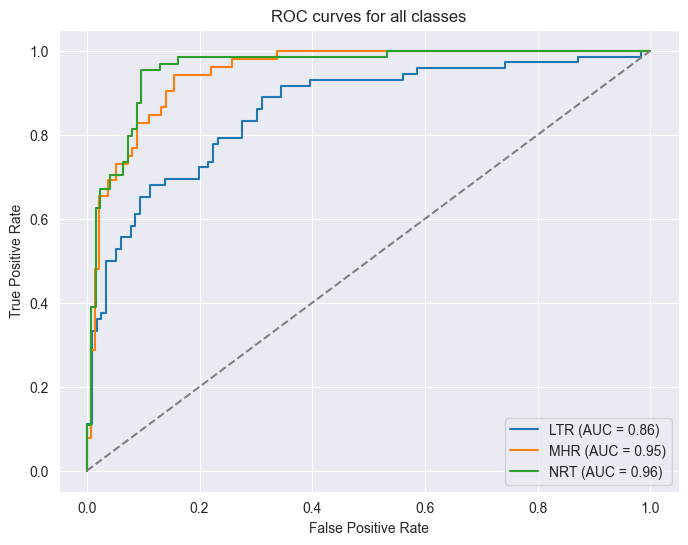

In [197]:
# Predict probabilities for the test set
y_score = logmodel.predict_proba(X_test_scaled)

# Convert the target variable to one-hot encoding using LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

# Initialize lists to store ROC curve data and AUC values for each class
fpr_list = []
tpr_list = []
auc_list = []

# Loop through each class and compute the ROC curve and AUC value
for class_id, class_name in enumerate(label_binarizer.classes_):
    fpr, tpr, _ = roc_curve(y_onehot_test[:, class_id], y_score[:, class_id])
    auc_value = roc_auc_score(y_onehot_test[:, class_id], y_score[:, class_id])
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc_value)

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
for class_id, class_name in enumerate(label_binarizer.classes_):
    plt.plot(fpr_list[class_id], tpr_list[class_id], label=f"{class_name} (AUC = {auc_list[class_id]:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves for all classes")
plt.legend()
plt.show()


In [198]:
cv_scores = cross_val_score(logmodel, X_train_scaled, y_train, cv=5)  
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())
logmodel.fit(X_train_scaled, y_train)
test_accuracy = logmodel.score(X_test_scaled, y_test)
print("Testing Accuracy:", test_accuracy)

Cross-Validation Scores: [0.77272727 0.8045977  0.72413793 0.74712644 0.67816092]
Mean CV Score: 0.7453500522466039
Standard Deviation of CV Scores: 0.042958783232135
Testing Accuracy: 0.7978723404255319


In [199]:
#graph gae jodi onek tel/oil thake

In [200]:
# # Define a range of hyperparameter values for the model
# hyperparam_range = np.logspace(-3, 3, 7)  # Example: Regularization strength values from 0.001 to 1000

# # Lists to store training and cross-validation accuracies
# train_accuracies = []
# cv_accuracies = []

# # Train the model for each hyperparameter value and calculate accuracies
# for C in hyperparam_range:
#     log_model = LogisticRegression(C=C)
#     # Calculate training accuracy
#     log_model.fit(X_train, y_train)
#     train_accuracy = log_model.score(X_train, y_train)
#     train_accuracies.append(train_accuracy)
    
#     # Perform cross-validation and calculate CV accuracy
#     cv_scores = cross_val_score(log_model, X_train, y_train, cv=5)
#     cv_accuracy = np.mean(cv_scores)
#     cv_accuracies.append(cv_accuracy)

# # Plot the training and CV accuracies against hyperparameter values
# plt.figure(figsize=(10, 6))
# plt.semilogx(hyperparam_range, train_accuracies, label='Training Accuracy')
# plt.semilogx(hyperparam_range, cv_accuracies, label='Cross-Validation Accuracy')
# plt.xlabel('Regularization Strength (C)')
# plt.ylabel('Accuracy')
# plt.title('Training and Cross-Validation Accuracies vs. Regularization Strength')
# plt.legend()
# plt.grid(True)
# plt.show()

In [201]:
print('############# Logistic Reg ###############')
print("Classification report:")
print(classification_report(y_test, y_pred))

############# Logistic Reg ###############
Classification report:
              precision    recall  f1-score   support

         LTR       0.79      0.67      0.72        72
         MHR       0.77      0.83      0.80        52
         NRT       0.83      0.92      0.87        64

    accuracy                           0.80       188
   macro avg       0.80      0.81      0.80       188
weighted avg       0.80      0.80      0.79       188



In [202]:
print(confusion_matrix(y_test, y_pred,labels=["LTR","MHR","NRT"]))

[[48 13 11]
 [ 8 43  1]
 [ 5  0 59]]


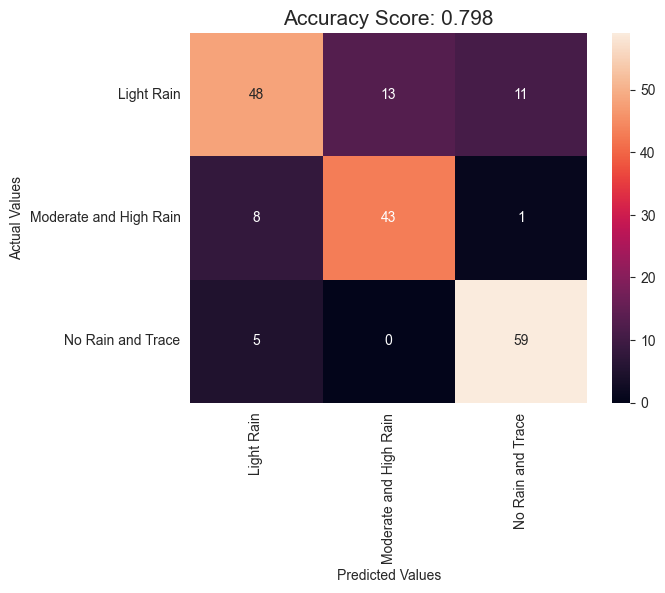

In [203]:
predictions = logmodel.predict(X_test_scaled)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f", xticklabels=['Light Rain','Moderate and High Rain','No Rain and Trace'], yticklabels=['Light Rain','Moderate and High Rain','No Rain and Trace'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

Decision Trees

In [204]:
DTclf=tree.DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
y_pred= DTclf.predict(X_test)

In [205]:
dt_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())
dt_classifier.fit(X_train, y_train)
test_accuracy = dt_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Cross-Validation Scores: [0.65909091 0.64367816 0.71264368 0.71264368 0.71264368]
Mean CV Score: 0.6881400208986415
Standard Deviation of CV Scores: 0.03040393246703763
Testing Accuracy: 0.675531914893617


In [206]:
print('############# DT ###############')
print(classification_report(y_test, y_pred))


############# DT ###############
              precision    recall  f1-score   support

         LTR       0.58      0.61      0.59        72
         MHR       0.76      0.73      0.75        52
         NRT       0.73      0.70      0.71        64

    accuracy                           0.68       188
   macro avg       0.69      0.68      0.68       188
weighted avg       0.68      0.68      0.68       188



In [207]:
print(confusion_matrix(y_test, y_pred,labels=["LTR","MHR","NRT"]))

[[44 12 16]
 [13 38  1]
 [19  0 45]]


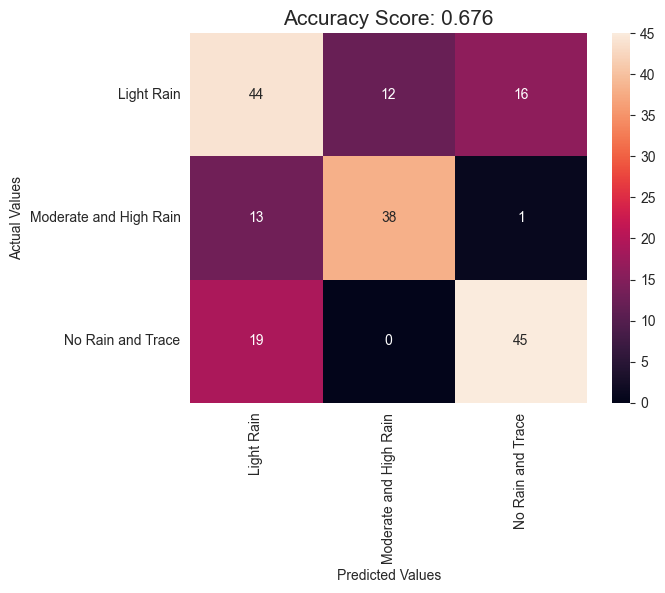

In [208]:
predictions = DTclf.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f", xticklabels=['Light Rain','Moderate and High Rain','No Rain and Trace'], yticklabels=['Light Rain','Moderate and High Rain','No Rain and Trace'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()


In [209]:
#####Predict probabilities for the test data.
probsDT = DTclf.predict_proba(X_test)
####Keep Probabilities of the positive class only.
probsDT = probsDT[:, 1]

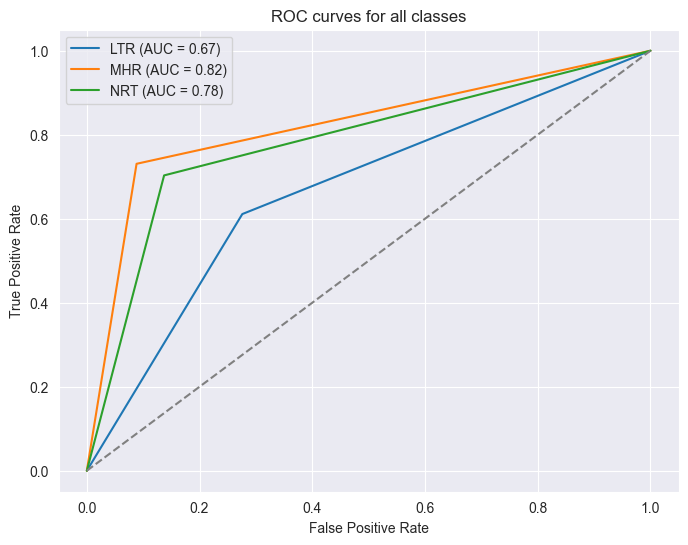

In [210]:


y_score = DTclf.predict_proba(X_test)


# Convert the target variable to one-hot encoding using LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

# Initialize lists to store ROC curve data and AUC values for each class
fpr_list = []
tpr_list = []
auc_list = []

# Loop through each class and compute the ROC curve and AUC value
for class_id, class_name in enumerate(label_binarizer.classes_):
    fpr, tpr, _ = roc_curve(y_onehot_test[:, class_id],y_score[:, class_id])
    auc_value = roc_auc_score(y_onehot_test[:, class_id], y_score[:, class_id])
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc_value)

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
for class_id, class_name in enumerate(label_binarizer.classes_):
    plt.plot(fpr_list[class_id], tpr_list[class_id], label=f"{class_name} (AUC = {auc_list[class_id]:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot the chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves for all classes")
plt.legend()
plt.show()


Random Forest

In [211]:
RFclf=RandomForestClassifier(n_estimators=101)
RFclf.fit(X_train, y_train)
y_pred=RFclf.predict(X_test)

In [212]:
#RFclf=RandomForestClassifier(n_estimators=101)
cv_scores = cross_val_score(RFclf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())
RFclf.fit(X_train, y_train)
test_accuracy = RFclf.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Cross-Validation Scores: [0.73863636 0.75862069 0.74712644 0.72413793 0.77011494]
Mean CV Score: 0.7477272727272727
Standard Deviation of CV Scores: 0.01587033058846826
Testing Accuracy: 0.776595744680851


In [213]:
print('############# RF ###############')
print("Classification report:")
print(classification_report(y_test, y_pred))

############# RF ###############
Classification report:
              precision    recall  f1-score   support

         LTR       0.73      0.61      0.67        72
         MHR       0.78      0.83      0.80        52
         NRT       0.77      0.88      0.82        64

    accuracy                           0.76       188
   macro avg       0.76      0.77      0.76       188
weighted avg       0.76      0.76      0.76       188



In [214]:
print(confusion_matrix(y_test, y_pred,labels=["LTR","MHR","NRT"]))

[[44 12 16]
 [ 8 43  1]
 [ 8  0 56]]


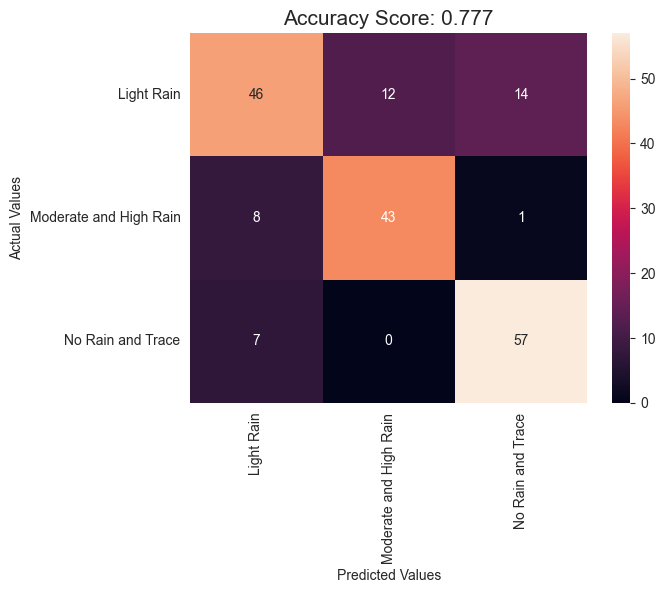

In [215]:
predictions = RFclf.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f", xticklabels=['Light Rain','Moderate and High Rain','No Rain and Trace'], yticklabels=['Light Rain','Moderate and High Rain','No Rain and Trace'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

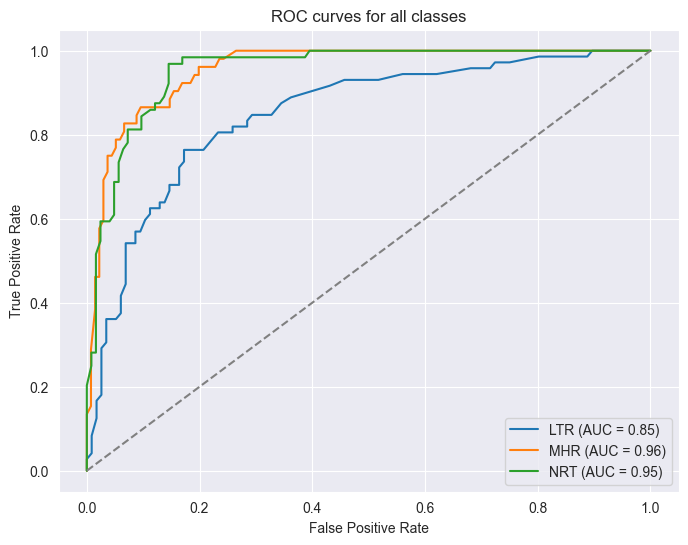

In [216]:
probsRF = RFclf.predict_proba(X_test)

# Convert the target variable to one-hot encoding using LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

# Initialize lists to store ROC curve data and AUC values for each class
fpr_list = []
tpr_list = []
auc_list = []

# Loop through each class and compute the ROC curve and AUC value
for class_id, class_name in enumerate(label_binarizer.classes_):
    fpr, tpr, _ = roc_curve(y_onehot_test[:, class_id],probsRF[:, class_id])
    auc_value = roc_auc_score(y_onehot_test[:, class_id], probsRF[:, class_id])
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc_value)

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
for class_id, class_name in enumerate(label_binarizer.classes_):
    plt.plot(fpr_list[class_id], tpr_list[class_id], label=f"{class_name} (AUC = {auc_list[class_id]:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot the chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves for all classes")
plt.legend()
plt.show()


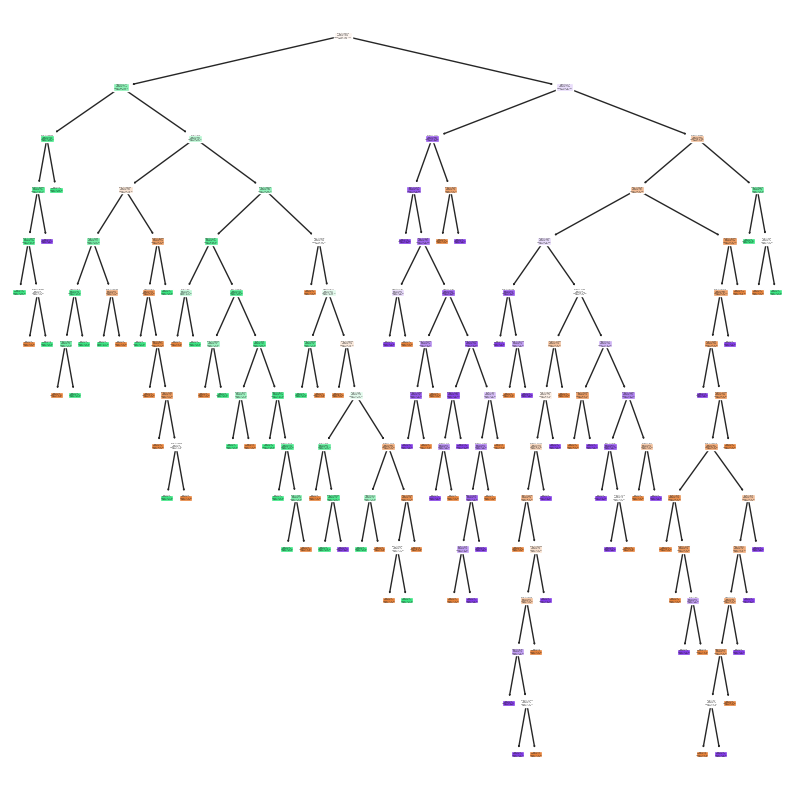

In [217]:
RFclf_w = RandomForestClassifier(n_estimators=100, random_state=999)
RFclf_w.fit(X_train, y_train)
dt = RFclf_w.estimators_[0]
plt.figure(figsize=(10, 10))
tree.plot_tree(dt, filled=True, class_names=["LTR", "MHR", "NRT"], feature_names=X.columns)
plt.show()

In [220]:
# # Create a random forest classifier object
# RFclf_w = RandomForestClassifier(criterion='entropy', n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_depth=10, random_state=42)

# # Fit the model to the entire dataset
# RFclf_w.fit(X, y)

logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)

LogisticRegression()

In [221]:
print('Prediction with RF :', logmodel.predict(X_train_scaled[1:5]))
# print('Prediction with RF :', RFclf_w.predict(X_test[1:5]))

Prediction with RF : ['NRT' 'LTR' 'LTR' 'LTR']
